# Nettoyage et traitement des données

**Auteur :** Joseph MINCHIN

**Date :** 05/01/2026

**Objectif :** Nettoyer et prétraiter les données afin qu'elles puiseent être utilisées dans des modèles prédictifs

## Récupération des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
student_df = pd.read_csv("../data/raw/StudentsPerformance.csv")
display(student_df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Récupération et gestion des valeurs manquantes

In [3]:
display(student_df[student_df.isnull().any(axis=1)])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


On constate qu'il n'y a pas de valeurs manquantes, il est donc inutile de faire une gestion de celles-ci

## Gestion des valeurs aberrantes

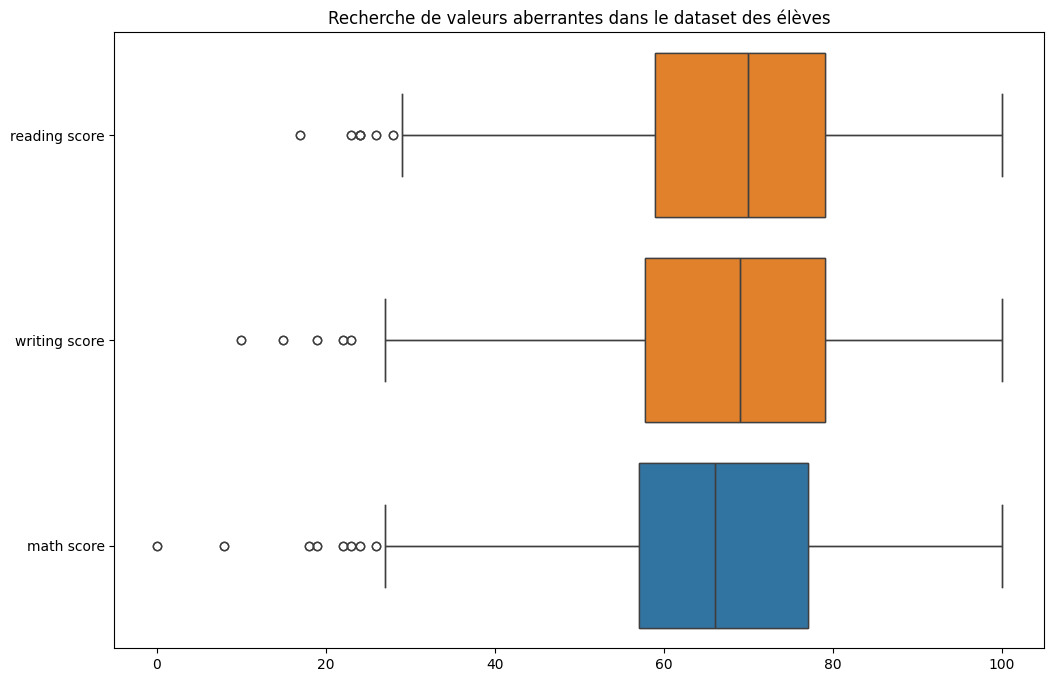

In [4]:
# Visualisation graphique des valeurs aberrantes

plt.figure(figsize=(12, 8))
sns.boxplot(data=student_df.drop(columns=['math score']), orient='h')
sns.boxplot(data=student_df.drop(columns=['reading score']), orient='h')
sns.boxplot(data=student_df.drop(columns=['writing score']), orient='h')

plt.title("Recherche de valeurs aberrantes dans le dataset des élèves")
plt.show()

## Encodage des variables catégoricielles

In [5]:
# Encodage des valeurs non numériques du dataframe dans des valeurs numériques afin de pourvoir les utiliser dans des modèles prédictifs

gender_mapping = {"male" : 0, "female" : 1}
race_mapping = {"group A" : 0, "group B" : 1, "group C" : 3, "group D" : 4, "group E" : 5}
degree_mapping = {"high school" : 0, "some high school" : 1, "some college" : 2, "associate's degree" : 3, "bachelor's degree" : 4, "master's degree" : 5}
lunch_mapping = {"standard" : 1, "free/reduced" : 0}
course_mapping = {"none" : 0, "completed" : 1}

student_df["gender"] = student_df["gender"].map(gender_mapping)
student_df["race/ethnicity"] = student_df["race/ethnicity"].map(race_mapping)
student_df["parental level of education"] = student_df["parental level of education"].map(degree_mapping)
student_df["lunch"] = student_df["lunch"].map(lunch_mapping)
student_df["test preparation course"] = student_df["test preparation course"].map(course_mapping)

student_df["average score"] = student_df[["reading score", "writing score"]].mean(axis=1)

student_df["math score"] = round((student_df["math score"] / 100), 2)
student_df["reading score"] = round((student_df["reading score"] / 100), 2)
student_df["writing score"] = round((student_df["writing score"] / 100), 2)
student_df["average score"] = round((student_df["average score"] / 100), 2)

display(student_df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,1,1,4,1,0,0.72,0.72,0.74,0.73
1,1,3,2,1,1,0.69,0.90,0.88,0.89
2,1,1,5,1,0,0.90,0.95,0.93,0.94
3,0,0,3,0,0,0.47,0.57,0.44,0.50
4,0,3,2,1,0,0.76,0.78,0.75,0.76
...,...,...,...,...,...,...,...,...,...
995,1,5,5,1,1,0.88,0.99,0.95,0.97
996,0,3,0,0,0,0.62,0.55,0.55,0.55
997,1,3,0,0,1,0.59,0.71,0.65,0.68
998,1,4,2,1,1,0.68,0.78,0.77,0.78


## Heatmap du DataFrame

<Axes: title={'center': 'Corrélation entre les différentes données'}>

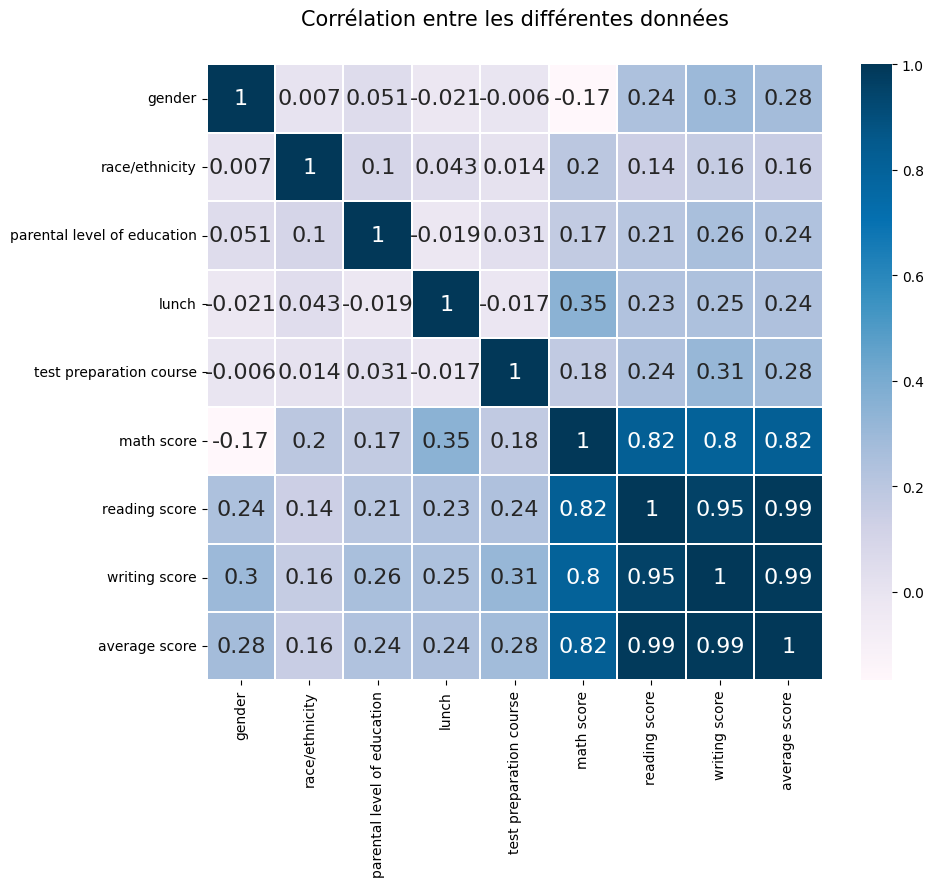

In [6]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Corrélation entre les différentes données", y = 1.05, size = 15)
sns.heatmap(student_df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

## Mise à l'échelle

In [7]:
# On regarde l'ordre de grandeur de chaque variable afin de vérifier si on doit modifier l'echelle de grandeur de certaines afin d'avoir des résultats probants

student_df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.518000,2.895000,2.064000,0.645000,0.358000,0.660890,0.691690,0.680540,0.686110
std,0.499926,1.540892,1.478543,0.478753,0.479652,0.151631,0.146002,0.151957,0.147211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.100000,0.140000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.570000,0.590000,0.577500,0.580000
50%,1.000000,3.000000,2.000000,1.000000,0.000000,0.660000,0.700000,0.690000,0.700000
75%,1.000000,4.000000,3.000000,1.000000,1.000000,0.770000,0.790000,0.790000,0.790000
max,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Puisque le modèle va se baser sur les notes et que celles-ci sont toutes sur le même ordre de grandeur (allant de 0 à 100), il n'est donc pas nécessaire de réaliser une mise à l'échelle

## Séparation des données en test/train et prévention de fuites de données

### Séparation des données en datasets de test et de train

In [8]:
# On part du principe que le modèle va vérifier si un élève va passer l'examen (on assume que la moyenne minimale pour passer est de 60)

pass_or_not = []
for i in range(len(student_df)):
    if student_df["average score"][i] >= 0.6:
        pass_or_not.append(1)
    else:
        pass_or_not.append(0)
student_df["exam passed"] = pass_or_not

# Les données avec lesquelles le modèle va déduire si l'élève a réussi ou non l'examen (sexe, niveau d'ducation des parents, éthnie, etc.)
data = student_df[student_df.columns[:5]]

# Le résultat que le modèle devra essayer de trouver (si l'élève à réussi ou non l'examen)
res = student_df[student_df.columns[-1]]

data_train, data_test, res_train, res_test = train_test_split(data, res, test_size=0.2, random_state=79)

# Concaténation des dataframes test et train afin de les sauvegarder dans des fichiers csv
test_df = pd.concat([data_test, res_test], axis=1)
train_df = pd.concat([data_train, res_train], axis=1)

# Sauvegarde des dataframes test et train dans des fichiers csv
test_df.to_csv("../data/processed/test.csv")
train_df.to_csv("../data/processed/train.csv")